In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = (
    pd.read_hdf("./dynamics_clean_agg.h5", "dynamics")
    .query("temperature==1.40 and pressure==13.50")
)

In [3]:
%matplotlib widget
plt.scatter(df["time"], df["msd_value"])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [43]:
import pandas as pd
import altair as alt
# This allows you to use more than 5000 rows of a dataframe
alt.data_transformers.enable("json")
# Render altair in a jupyter notebook
alt.renderers.enable('notebook')


# define the theme by returning the dictionary of configurations
def large():
    return {
        'config': {
            'view': {
                'height': 600,
                'width': 800,
            },
        }
    }

alt.themes.register("large", large)
alt.themes.enable("large")

ThemeRegistry.enable('large')

In [44]:
df = pd.read_hdf("./dynamics_clean_agg.h5", "dynamics")

In [45]:
log_scale = alt.Scale(type="log")
altair_chart = alt.Chart(df.query("pressure==13.50")).mark_point().encode(
    x=alt.X("time", scale=log_scale),
    y=alt.Y("msd_value", scale=log_scale),
    color="temperature:N",
)

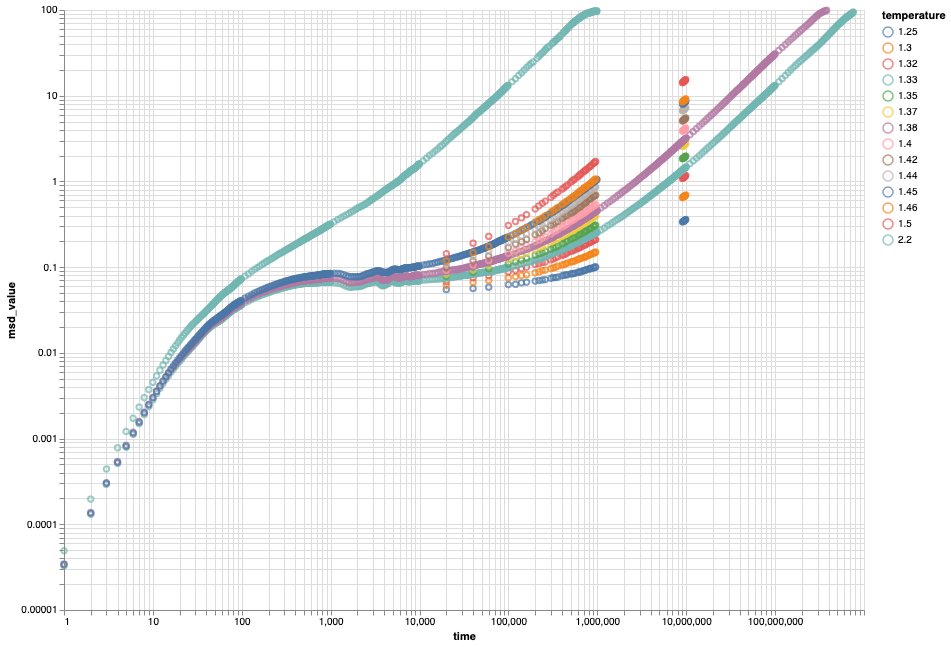

In [46]:
altair_chart

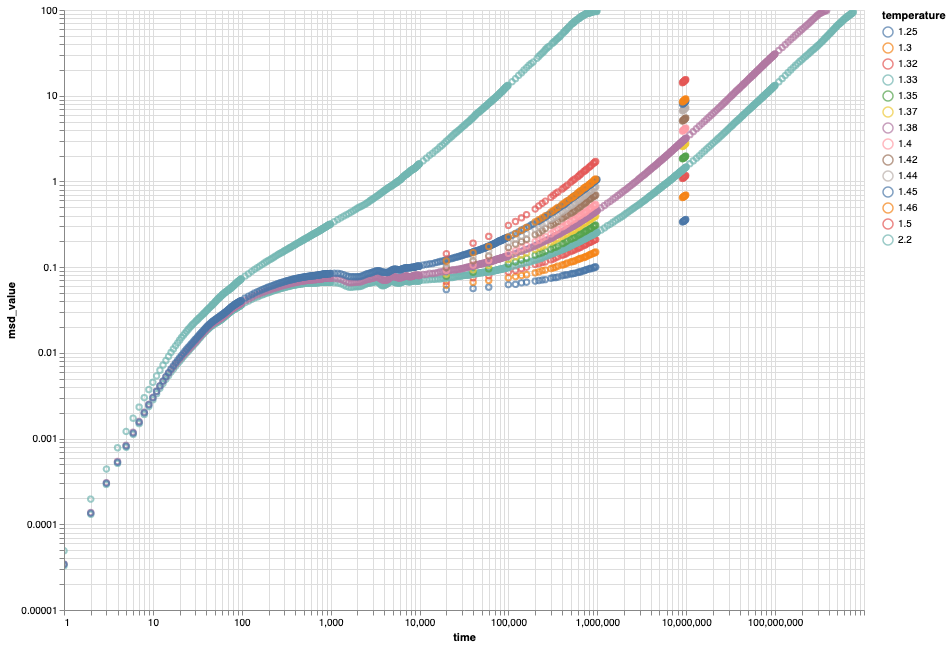

In [47]:
altair_chart.interactive()

In [48]:
from sdanalysis.figures import plot_frame, show, output_notebook
from sdanalysis.read import open_trajectory
output_notebook()

Loading BokehJS ...

In [49]:
snap = next(open_trajectory("./dataset/dump-Trimer-P13.50-T1.50-p2.gsd"))
show(plot_frame(snap))

In [50]:
import ipywidgets
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [12, 10]

In [51]:
plt.rcParams["figure.figsize"]

[12.0, 10.0]

In [52]:
@ipywidgets.interact(wavelength=(1, 10))
def plot_sine(wavelength=1):
    theta = np.linspace(0, 2*np.pi)
    return plt.plot(theta, np.sin(wavelength*theta))

interactive(children=(IntSlider(value=1, description='wavelength', max=10, min=1), Output()), _dom_classes=('w…

In [56]:
quantities = [column[:-6] for column in df.columns if "value" in column]
for col in ["index", "keyframe", "mean_displacement", "scattering_function"]:
    quantities.remove(col)

In [57]:
def plot_altair(quantity):
    x_scale = alt.Scale(type="log")
    y_scale = alt.Scale(type="linear")
    if quantity in ["msd"]:
        y_scale = alt.Scale(type="log")
    return alt.Chart(df.query("pressure==13.50")).mark_point().encode(
        x=alt.X("time", scale=x_scale),
        y=alt.Y(quantity+"_value", scale=y_scale),
        color="temperature:N"
    )

In [58]:
@ipywidgets.interact(quantity=quantities)
def plot_quantity(quantity):
    return plot_altair(quantity).interactive()

interactive(children=(Dropdown(description='quantity', options=('msd', 'mfd', 'alpha', 'com_struct', 'mean_rot…

In [59]:
!sdanalysis figure -m knn-trimer.pkl --directory dataset/

^C

Interrupted, shutting down
